I have been having issues finding a good kernel for the emus, espeically the DS one. Gonna try a few things here.

In [22]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [23]:
from pearce.emulator import NashvilleHot
from itertools import product
from GPy.kern import *
import numpy as np
from os import path
from sys import argv
import h5py

In [24]:
training_file = '/u/ki/swmclau2/des/ds_hsab/PearceDsHSABCosmo.hdf5'
assert path.isfile(training_file)
test_file = '/u/ki/swmclau2/des/ds_hsab_test/PearceDsHSABCosmoTest.hdf5'
assert path.isfile(test_file)
#save_fname = argv[3]

In [25]:
with h5py.File(training_file, 'r') as f:
    HOD_params = len(f.attrs['hod_param_names'])

In [26]:
cosmo_idx, hod_idx = 2,-1
cosmo_kernels = [Linear(input_dim=7, ARD=True), RBF(input_dim=7, ARD=True), Linear(input_dim=7, ARD=True) + RBF(input_dim=7, ARD=True), Linear(input_dim=7, ARD=True) + Matern32(input_dim=7, ARD=True), \
          Matern32(input_dim=7, ARD=True)+RBF(input_dim=7, ARD=True) + Bias(input_dim=7)]
HOD_kernels = [ Matern32(input_dim=HOD_params, ARD=True), RBF(input_dim=HOD_params, ARD=True) + Linear(input_dim=HOD_params, ARD=True), Matern32(input_dim=HOD_params, ARD=True)+RBF(input_dim=HOD_params, ARD=True) + Bias(input_dim=HOD_params)\
               , RBF(input_dim=HOD_params, ARD=True) ]

#k = (cosmo_kernels[3], HOD_kernels[0])
k = (cosmo_kernels[cosmo_idx], HOD_kernels[hod_idx])

In [27]:
print k

(<GPy.kern.src.add.Add object at 0x7fb4d5b5bf50>, <GPy.kern.src.rbf.RBF object at 0x7fb4a30af8d0>)


In [28]:
fixed_params = {'z':0.0}

# best for wp:  either   RBF & Matern32 or Linear + RBF & RBF & Matern32
# best for DS: Linear + RBF, Matern32
#kernels = product(cosmo_kernels, HOD_kernels) 
#for k in kernels:
hyperparams = {'kernel': k , \
               'optimize': True}

In [53]:
emu = NashvilleHot(training_file, hyperparams=hyperparams,fixed_params = fixed_params, downsample_factor = 0.01)

0 ***************
Optimization restart 1/3, f = -2131.28643958
Optimization restart 2/3, f = -2131.57380133
Optimization restart 3/3, f = -2131.05543707
1 ***************
Optimization restart 1/3, f = -2166.53451337
Optimization restart 2/3, f = -2165.86317804
Optimization restart 3/3, f = -2166.55602847
2 ***************
Optimization restart 1/3, f = -1038.35090954
Optimization restart 2/3, f = -2027.41197291
Optimization restart 3/3, f = -2230.19571571
3 ***************
Optimization restart 1/3, f = -2229.43720708
Optimization restart 2/3, f = -2237.0186201
Optimization restart 3/3, f = -2237.02149805
4 ***************


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide


Optimization restart 1/3, f = -2282.10189422
Optimization restart 2/3, f = -1046.3028249
Optimization restart 3/3, f = -2302.05371089
5 ***************
Optimization restart 1/3, f = -826.464727901
Optimization restart 2/3, f = -2238.29578339
Optimization restart 3/3, f = -2241.86321231
6 ***************
Optimization restart 1/3, f = -2196.12630676
Optimization restart 2/3, f = -772.060046144
Optimization restart 3/3, f = -2196.12878156
7 ***************
Optimization restart 1/3, f = -1929.43990186
Optimization restart 2/3, f = -2123.87531089
Optimization restart 3/3, f = -2124.55584064
8 ***************
Optimization restart 1/3, f = -2066.24104504
Optimization restart 2/3, f = -1509.42597623
Optimization restart 3/3, f = -2065.58510851
9 ***************
Optimization restart 1/3, f = -454.933452693
Optimization restart 2/3, f = -440.570910249
Optimization restart 3/3, f = -1939.28527301
10 ***************


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square


Optimization restart 1/3, f = -1860.02194842
Optimization restart 2/3, f = -1860.36874573
Optimization restart 3/3, f = -1860.29991139
11 ***************
Optimization restart 1/3, f = -1776.13795347
Optimization restart 2/3, f = -1776.44898672
Optimization restart 3/3, f = -1777.00667064
12 ***************
Optimization restart 1/3, f = -1697.88429512
Optimization restart 2/3, f = -1692.77346502
Optimization restart 3/3, f = -1692.81004326
13 ***************
Optimization restart 1/3, f = -433.258905737
Optimization restart 2/3, f = -1579.82914784
Optimization restart 3/3, f = -1646.47327827
14 ***************


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square


Optimization restart 1/3, f = -1614.94284987
Optimization restart 2/3, f = -427.425912471
Optimization restart 3/3, f = -1614.93197679
15 ***************


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square


Optimization restart 1/3, f = -387.096597413
Optimization restart 2/3, f = -383.974576413
Optimization restart 3/3, f = -1291.29841946
16 ***************


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square


Optimization restart 1/3, f = -1503.45869169
Optimization restart 2/3, f = -392.232971121
Optimization restart 3/3, f = -1503.45149779
17 ***************


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square


Optimization restart 1/3, f = -1441.39471133
Optimization restart 2/3, f = -363.408819678
Optimization restart 3/3, f = -455.312122384


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square


In [56]:
pred_y, data_y = emu.goodness_of_fit(test_file, statistic = None)#, downsample_factor = 0.1)

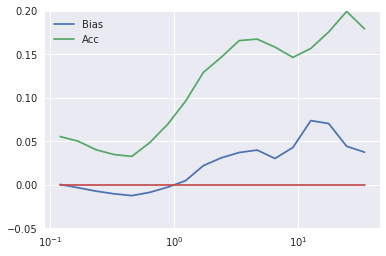

In [57]:
plt.plot(emu.scale_bin_centers, ((10**pred_y - 10**data_y)/(10**data_y)).mean(axis=1), label= 'Bias')
plt.plot(emu.scale_bin_centers, (np.abs(10**pred_y - 10**data_y)/(10**data_y)).mean(axis =1), label = 'Acc')
plt.plot(emu.scale_bin_centers, np.zeros_like(emu.scale_bin_centers))
plt.xscale('log')
plt.legend(loc='best')
plt.ylim([-0.05, 0.2])
plt.show()
# average over realizations

In [32]:
pred_y_rs= pred_y.reshape((len(emu.scale_bin_centers),5,7, -1), order = 'F')[:,0,:,:]
data_y_rs= data_y.reshape((len(emu.scale_bin_centers),5,7, -1), order = 'F').mean(axis = 1)
R = (10**pred_y_rs - 10**data_y_rs).reshape((18,-1), order = 'F')

In [33]:
cov = R.dot(R.T)/(R.shape[1]-1)
print k
print 'Yerr', np.sqrt(np.diag(cov))/(10**data_y.mean(axis=1))
print '*'*10

#np.save(save_fname, cov)

(<GPy.kern.src.add.Add object at 0x7fb4d5b5bf50>, <GPy.kern.src.rbf.RBF object at 0x7fb4a30af8d0>)
Yerr [0.0528994  0.03889072 0.031714   0.03003435 0.04695663 0.07623566
 0.11577763 0.16630933 0.22633337 0.28815892 0.3404291  0.33963197
 0.31063317 0.27194316 0.24322808 0.23000781 0.19759283 0.19110487]
**********


In [34]:
fname = '/u/ki/swmclau2/des/PearceMCMC/HOD_wp_ds_rmin_None_HOD.hdf5'
f = h5py.File(fname, 'r')

In [35]:
#if obs == 'wp':
#    true_data = f['data'][:len(r_bins)-1]
#else:
mcmc_data = f['data'][18:]

#if obs == 'wp':
#    cov = f['cov'][:len(r_bins)-1][:, :len(r_bins)-1]
#else:
cov = f['cov'][18:][:, 18:]
yerr = np.sqrt(np.diag(cov))

In [36]:
sim_info = eval(f.attrs['sim'])
cosmo_params = {'simname': sim_info['simname'], 
                'boxno': sim_info['sim_hps']['boxno'],\
                'realization': sim_info['sim_hps']['realization'], 
                'scale_factors':[sim_info['scale_factor']],\
                'system': sim_info['sim_hps']['system']}
hod_params = sim_info['hod_params']
f.close()

In [37]:
sim_info

{'cosmo_params': {'H0': 65.7317,
  'Neff': 3.2,
  'ln10As': 3.06395,
  'ns': 0.971515,
  'ombh2': 0.022762900000000003,
  'omch2': 0.11283,
  'w0': -0.861513},
 'gal_type': 'HOD',
 'hod_name': 'zheng07',
 'hod_params': {'alpha': 1.083,
  'conc_gal_bias': 1.0,
  'logM0': 13.2,
  'logM1': 14.2,
  'logMmin': 13.06094217689994,
  'sigma_logM': 0.2},
 'min_ptcl': 100,
 'nd': '5e-4',
 'scale_factor': 1.0,
 'sim_hps': {'boxno': 1,
  'downsample_factor': 0.01,
  'particles': True,
  'realization': 0,
  'system': 'ki-ls'},
 'simname': 'testbox'}

In [38]:
from pearce.mocks import cat_dict
boxno = 3
realization = 2
cat = cat_dict['testbox'](boxno = boxno, realization = realization )#construct the specified catalog!

In [39]:
hod_params = {'alpha': 1.083,
 'conc_gal_bias': 1.0,
 'logM0': 13.2,
 'logM1': 14.2,
 'logMmin': 13.06094217689994,
 'sigma_logM': 0.2}

In [40]:
hod_idx = 64

In [41]:
with h5py.File(test_file, 'r') as f:
    hod_param_names = f.attrs['hod_param_names']
    hod_param_vals = f.attrs['hod_param_vals'][hod_idx]
    
    cosmo_param_names = f.attrs['cosmo_param_names']
    cosmo_param_vals = f.attrs['cosmo_param_vals'][boxno*5+realization]
    
    true_data = f['cosmo_no_%02d'%(boxno*5+realization)]['a_1.000']['obs'][hod_idx]

hod_params = dict(zip(hod_param_names, hod_param_vals))

#hod_params.update(dict(zip(cosmo_param_names, cosmo_param_vals)))

In [42]:
cpv = cat._get_cosmo_param_names_vals()

cat_val_dict =  {key: val for key, val in zip(cpv[0], cpv[1])}

In [43]:
true_param_dict = cat_val_dict.copy()
for hp, hv in hod_params.iteritems():
    if hp == 'logMmin':
        continue
    true_param_dict[hp] = hv
true_pred = emu.emulate_wrt_r(true_param_dict)[0]

In [44]:
rbc = emu.scale_bin_centers

In [45]:
N = 10
cmap = sns.color_palette("BrBG_d", N)

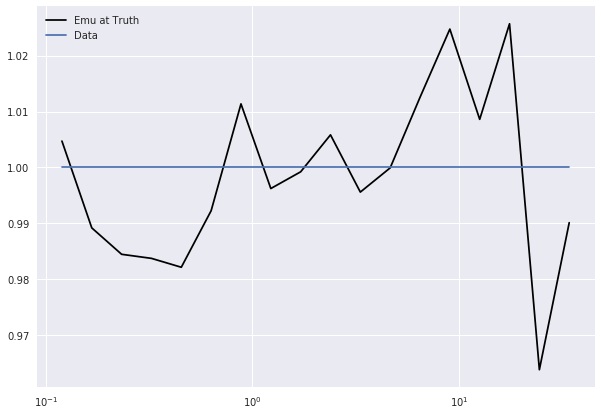

In [46]:
fig = plt.figure(figsize=(10,7))

plt.plot(rbc, 10**true_pred/10**true_data,label = 'Emu at Truth', color ='k')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Sim' )
#plt.errorbar(rbc, np.ones_like(true_data), yerr=yerr/true_data, label = 'Data')
plt.plot(rbc, np.ones_like(true_data), label = 'Data')

plt.xscale('log')
plt.legend(loc='best')
plt.show();

0 0.1012181
1 0.10461351111111111
2 0.10800892222222222
3 0.11140433333333333
4 0.11479974444444443
5 0.11819515555555554
6 0.12159056666666665
7 0.12498597777777776
8 0.12838138888888886
9 0.13177679999999997


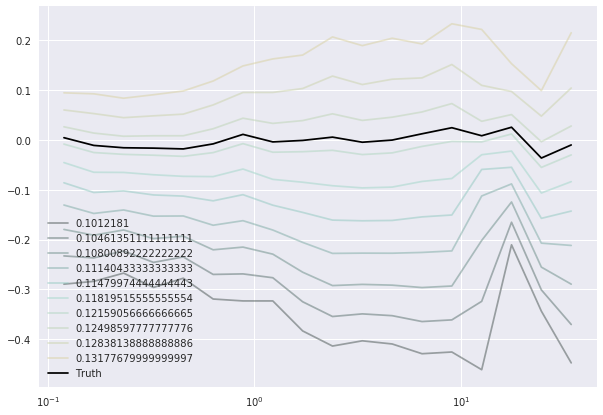

In [47]:
fig = plt.figure(figsize=(10,7))
varied_pname = 'omch2'
lower, upper = emu.get_param_bounds(varied_pname)
i = 0
for c, val in zip(cmap, np.linspace(lower, upper, N) ):
    print i, val
    i+=1
    param_dict = true_param_dict.copy()
    param_dict[varied_pname] = val
    pred = emu.emulate_wrt_r(param_dict)[0]
    plt.plot(rbc, (10**pred-10**true_data[-len(emu.scale_bin_centers):])/10**true_data[-len(emu.scale_bin_centers):],\
             alpha = 0.5,label = val, color =c)
    
pred = emu.emulate_wrt_r(true_param_dict)[0]
plt.plot(rbc, (10**pred-10**true_data[-len(emu.scale_bin_centers):])/10**true_data[-len(emu.scale_bin_centers):], label = 'Truth', color = 'k')    
#plt.errorbar(rbc, np.zeros_like(true_data[-len(emu.scale_bin_centers):]), yerr=yerr/true_data[-len(emu.scale_bin_centers):], label = 'Data')
#plt.loglog()
plt.xscale('log')
plt.legend(loc='best')
plt.show();